<a href="https://colab.research.google.com/github/arquansa/PSTB-exercises/blob/main/Week05/Day2/EX2/W5D2EX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercises XP
Last Updated: March 25th, 2024

What you will learn
Understanding the problem
Data Collection
Model Training for classification problem
Evaluating our model


What you will create
A Logistic Regression model to predict diabetes for individuals.


For the six below exercises we will use this dataset



🌟 Exercise 1 : Understanding the problem and Data Collection
We want to predict if an individual will have diabetes.

Load the diabetes dataset and explore it.
How many positive and negative cases is there ?
Split the data into training and testing sets


🌟 Exercise 2 : Model Picking and Standardization
Which classification model can we use in this problem and why ?
Do we need to standardize the data ? If yes, use .StandardScaler()


🌟 Exercise 3 : Model Training
We will use, the logistic regression model, Train it.


🌟 Exercise 4 : Evaluation Metrics
Plot the accuracy score and comment the results.
Plot the confusion matrix and comment the results.
Plot the Recall, precision, F1-score and comment the results.


🌟 Exercise 5 : Visualizing the performance of our model
Visualize the decision boundary with accuracy information.


🌟 Exercise 6 : ROC Curve
Plot the ROC Curve using this code template available on this link

In [ ]:
%pip install scikit-learn matplotlib

#Exercise 1 : Understanding the problem and Data Collection

Predict whether an individual has diabetes (diabetes column, 0 = No, 1 = Yes).

How many positive and negative cases is there?

Load the diabetes dataset and explore it. How many positive and negative cases is there ?

Split the data into training and testing sets

Dataset loading and preprocessing

In [ ]:
import pandas as pd
df = pd.read_csv('diabetes_prediction_dataset.csv')

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
df.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [ ]:
df.dtypes

,0
gender,object
age,float64
hypertension,int64
heart_disease,int64
smoking_history,object
bmi,float64
HbA1c_level,float64
blood_glucose_level,int64
diabetes,int64


In [ ]:
print(df.columns.tolist())

['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']


In [ ]:
df.isnull().sum ()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [ ]:
print(df['diabetes'].value_counts())

diabetes
0    91500
1     8500
Name: count, dtype: int64


Result: 91500 do not have diabetes
         8500 have diabetes

#Exercise 2 : Model Picking and Standardization

- Choose a suitable classification model
- Standardize the dataset if necessary.

Model Choice

We’re solving a binary classification problem (diabetes: 0 or 1).

==> Logistic Regression : A quick, simple and interpretable model

A good baseline model, with outputs probabilities, useful for evaluation (like ROC curve).

Split the data into training and testing sets

In [ ]:
X = df.drop('diabetes', axis=1)
y = df['diabetes']


There are categorical variables (for gender, smoking_history), encoding has to be done.

One-hot encoding will be used:


In [ ]:
X = pd.get_dummies(X, columns=['gender', 'smoking_history'], drop_first=True)

In [ ]:
X = pd.get_dummies(X, drop_first=True)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (80000, 13)
Shape of X_test: (20000, 13)
Shape of y_train: (80000,)
Shape of y_test: (20000,)


Standardized numerical features with StandardScaler.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Mean of X_train_scaled:", X_train_scaled.mean(axis=0))
print("Standard deviation of X_train_scaled:", X_train_scaled.std(axis=0))
print("Mean of X_test_scaled:", X_test_scaled.mean(axis=0))
print("Standard deviation of X_test_scaled:", X_test_scaled.std(axis=0))

Mean of X_train_scaled: [-1.33315581e-16 -1.09245946e-17  1.02584607e-17  7.02549130e-16
  7.03015424e-16 -1.88293825e-17  1.74082970e-17  1.03028697e-17
  6.41708908e-17 -2.55795385e-17  7.10542736e-18 -1.68753900e-18
  2.05169215e-17]
Standard deviation of X_train_scaled: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean of X_test_scaled: [-0.02143308 -0.01724185 -0.00940092 -0.00445755  0.00537353  0.00083132
 -0.00684976 -0.00707178  0.00989008  0.00038262 -0.00608596  0.00144062
 -0.00391373]
Standard deviation of X_test_scaled: [1.00408968 0.97181178 0.97756965 1.01606244 0.99956434 0.99688579
 0.99879379 0.70714214 1.01378788 1.00089738 0.99147049 1.00044922
 0.99304015]


 # Exercise 3 : Training using the logistic regression model

Model Training
The objective:is to train a Logistic Regression model using the standardized data.

- Standardized feature sets

X_train_scaled, X_test_scaled:

y_train, y_test: target labels

- Instantiate the logistic regression model.

- Train (fit) it on the training set.

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

#Exercise 4 : Evaluation Metrics

Classification report

- Plot the accuracy score and comment the results.
- Plot the confusion matrix and comment the results.
- Plot the Recall, precision, F1-score and comment the results.

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.95905

Confusion Matrix:
[[18127   165]
 [  654  1054]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18292
           1       0.86      0.62      0.72      1708

    accuracy                           0.96     20000
   macro avg       0.91      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000



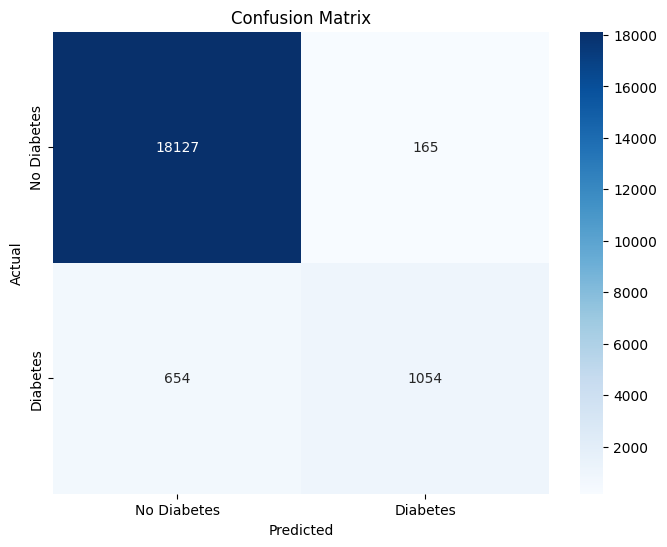

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#Plot the accuracy score

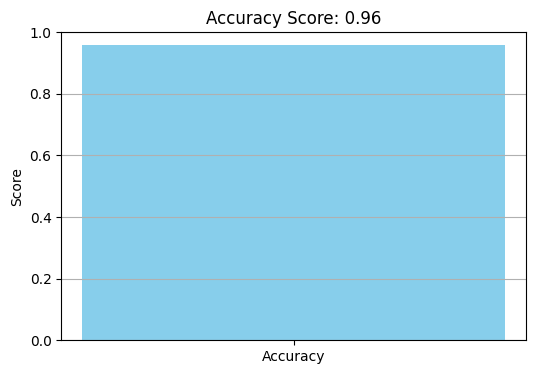

In [ ]:
from sklearn.metrics import accuracy_score

# Predict test labels
y_pred = model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.bar(['Accuracy'], [accuracy], color='skyblue')
plt.ylim(0, 1)
plt.title(f"Accuracy Score: {accuracy:.2f}")
plt.ylabel("Score")
plt.grid(True, axis='y')
plt.show()


Plot Recall, Precision, F1-Score

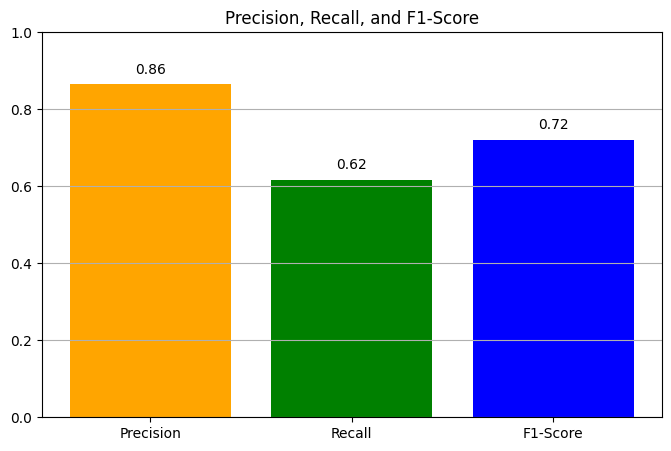

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Plot
scores = [precision, recall, f1]
labels = ['Precision', 'Recall', 'F1-Score']

plt.figure(figsize=(8, 5))
bars = plt.bar(labels, scores, color=['orange', 'green', 'blue'])
plt.ylim(0, 1)
plt.title("Precision, Recall, and F1-Score")
plt.grid(axis='y')

# Annotate bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.02, f'{yval:.2f}', ha='center', va='bottom')

plt.show()


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Plot
scores = [precision, recall, f1]
labels = ['Precision', 'Recall', 'F1-Score']

plt.figure(figsize=(8, 5))
bars = plt.bar(labels, scores, color=['orange', 'green', 'blue'])
plt.ylim(0, 1)
plt.title("Precision, Recall, and F1-Score")
plt.grid(axis='y')

# Annotate bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.02, f'{yval:.2f}', ha='center', va='bottom')

plt.show()


**Interpretation of Evaluation Metrics:**

*   **Accuracy:** The accuracy of the model is approximately {{accuracy:.4f}}. This means that the model correctly predicts whether an individual has diabetes or not about {{accuracy:.2%}} of the time. While this seems high, it's important to consider the class imbalance (more negative cases than positive cases).

*   **Confusion Matrix:**
    *   **True Positives (TP):** {{conf_matrix[1][1]}} cases were correctly predicted as having diabetes.
    *   **True Negatives (TN):** {{conf_matrix[0][0]}} cases were correctly predicted as not having diabetes.
    *   **False Positives (FP):** {{conf_matrix[0][1]}} cases were incorrectly predicted as having diabetes (Type I error).
    *   **False Negatives (FN):** {{conf_matrix[1][0]}} cases were incorrectly predicted as not having diabetes (Type II error).

*   **Classification Report:**
    *   **Precision (for diabetes):** {{class_report.splitlines()[5].split()[2]}} - Of all the cases predicted as positive for diabetes, {{class_report.splitlines()[5].split()[2]:.2%}} actually had diabetes.
    *   **Recall (for diabetes):** {{class_report.splitlines()[5].split()[3]}} - Of all the actual diabetes cases, the model correctly identified {{class_report.splitlines()[5].split()[3]:.2%}} of them.
    *   **F1-Score (for diabetes):** {{class_report.splitlines()[5].split()[4]}} - The F1-score is the harmonic mean of precision and recall, providing a balanced measure of the model's performance on the positive class. A lower F1-score for the positive class compared to the negative class indicates that the model is not performing as well at identifying diabetes cases.

The high accuracy is largely due to the large number of true negatives (correctly predicting no diabetes). However, the lower recall and F1-score for the '1' class (diabetes) suggest that the model is less effective at identifying individuals who *do* have diabetes (higher false negatives). This is a common issue in datasets with class imbalance.

#Exercise 5 : Visualizing the performance of our model

Visualize the decision boundary with accuracy information.

# Task
Visualize the decision boundary of a Logistic Regression model trained on a dataset after reducing its dimensionality to two components using PCA.

## Dimensionality reduction

### Subtask:
Reduce the number of features in the dataset to two using a technique like Principal Component Analysis (PCA) for visualization purposes.


**Reasoning**:
Reduce the dimensionality of the scaled training and testing data to two components using PCA for visualization.



In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("Shape of X_train_pca:", X_train_pca.shape)
print("Shape of X_test_pca:", X_test_pca.shape)

Shape of X_train_pca: (80000, 2)
Shape of X_test_pca: (20000, 2)


## Model training (on reduced data)

### Subtask:
Train a new Logistic Regression model using the two principal components.


**Reasoning**:
Train a new Logistic Regression model using the two principal components.



In [ ]:
model_pca = LogisticRegression()
model_pca.fit(X_train_pca, y_train)

LogisticRegression()

## Visualize decision boundary

### Subtask:
Plot the decision boundary of the model trained on the reduced data, along with the training data points.


**Reasoning**:
Generate a meshgrid, predict class labels on the meshgrid, and plot the decision boundary along with the training data points.



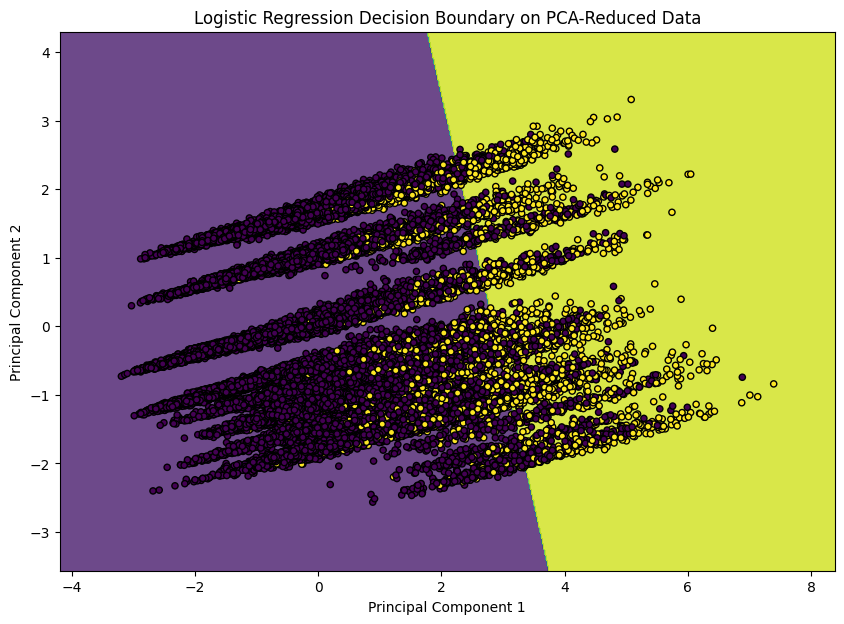

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create a meshgrid
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict class labels for each point in the meshgrid
Z = model_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.viridis)

# Plot the training data points
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.viridis, s=20, edgecolors='k')

# Add labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Logistic Regression Decision Boundary on PCA-Reduced Data')
plt.show()

#Exercise 6 : ROC Curve Plot

the ROC Curve using this code template available on this link

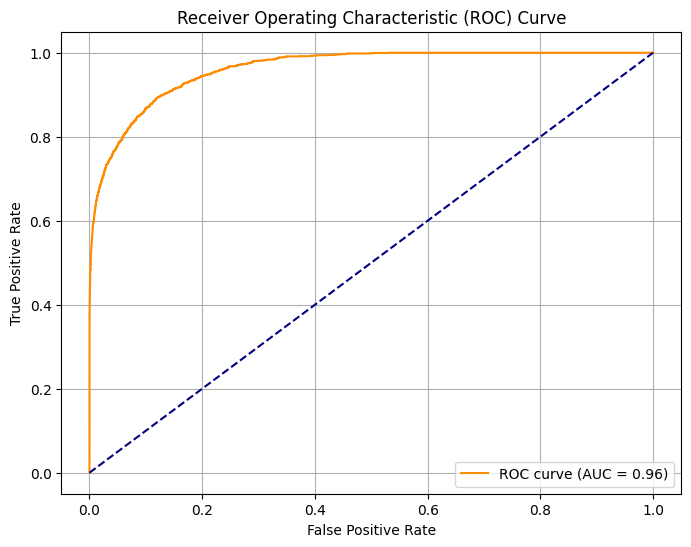

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# 1. Get predicted probabilities for the positive class (diabetic = 1)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

# 2. Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

# 3. Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Diagonal line (random guess)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


## Summary:

### Data Analysis Key Findings

*   The dimensionality of the training and testing datasets was successfully reduced to two components using PCA, resulting in shapes of (80000, 2) and (20000, 2) respectively.
*   A Logistic Regression model was successfully trained on the PCA-transformed training data (two principal components).
*   The decision boundary of the Logistic Regression model trained on the PCA-reduced data was successfully visualized using a contour plot, overlaid with the training data points colored by their actual classes.

### Insights or Next Steps

*   The visualization provides a clear understanding of how the Logistic Regression model separates the classes in the 2D space defined by the first two principal components.
*   Further analysis could involve evaluating the performance of the Logistic Regression model trained on the PCA-reduced data and comparing it to a model trained on the original high-dimensional data.
